In [1]:
import nltk
import praw
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.tokenize import TweetTokenizer
from nltk.corpus import stopwords

import regex as re
from praw.models import MoreComments
from collections import Counter
from nltk.stem import WordNetLemmatizer

reddit = praw.Reddit(client_id="j45kzjbwzT3taMKalRM7sQ",
                     client_secret="NMNfk12VgF7r1ydhaXXmWF1aeTgWBw",
                     user_agent="which one of you is being a dick",
                     username='Soft-Ad-6632',
                     password='1234qwer!@#$QWER',
                     check_for_async=False)

print(reddit.user.me())

subreddit = reddit.subreddit('politics')
threads = subreddit.hot(limit=100)

t = TweetTokenizer()

def sentiment_check(comment):
    sid = SentimentIntensityAnalyzer()
    polarities = sid.polarity_scores(comment)
    if polarities['neg'] > polarities['pos']:
        return 'negative'
    elif polarities['neg'] < polarities['pos']:
        return 'positive'
    else:
        return None

Soft-Ad-6632


In [2]:
all_words = []
negative_comments = 0
fancy_comments = 0
negative_fancy = 0
total_comments = 0
stop_words = stopwords.words('english')
lemmatizer = WordNetLemmatizer()

for submission in threads:
    print(submission.title)
    sub_list = []
    all_temp = []
    for top_comment in submission.comments:
        all_temp_temp = []
        if not isinstance(top_comment, MoreComments):
            total_comments += 1
            temp = t.tokenize(top_comment.body)
            for word in temp:
                lemma = lemmatizer.lemmatize(word.lower())
                if word not in stop_words and word.isalpha():
                    all_temp_temp.append(lemma)
            positive = 0
            negative = 0
            for reply in top_comment.replies:
                if not isinstance(reply, MoreComments):
                    sentiment = sentiment_check(reply.body)
                    if sentiment == "positive":
                        positive += 1
                    if sentiment == "negative":
                        negative += 1
                    if sentiment == None:
                        pass
                else:
                    continue
            if negative > positive:
                comment_polarity = 0
                negative_comments += 1
            else:
                comment_polarity = 1
        else:
            continue
        temp_counter = Counter(all_temp_temp)
        if len(temp_counter) != 0:
            comment_score = sum(temp_counter.values())/len(temp_counter)
#             lengths = 0
#             for key in temp_counter.keys():
#                 lengths += len(key)
#             comment_score = lengths/len(temp_counter)
            all_temp.append([positive, negative, comment_score, Counter(all_temp_temp)])
    temp_sum = 0
    for comment_stat in all_temp:
        temp_sum += comment_stat[2]
    if len(all_temp) != 0:
        submission_score = temp_sum/len(all_temp)
    else:
        submission_score = 0
    all_words.append([submission_score, all_temp])

/r/Politics now has user-selectable flair representing Indigenous Nations.
Accused Russian agent who lobbied lawmakers only donated to one politician: Tulsi Gabbard
Tulsi Gabbard labeled a "Russian asset" for pushing U.S. biolabs in Ukraine claim
A reminder from Joe: The man in the red hat ransomed Ukrainian safety for a 'favor'
Tulsi Gabbard demands Romney resign after calling her a "treasonous liar"
Scott, Rubio vote against bill to fund federal government and provide aid to Ukraine
Leaked Kremlin Memo to Russian Media: It Is “Essential” to Feature Tucker Carlson
Ukraine dents 'America First' thinking deep in the heart of Trump country
Critics accuse CPAC of becoming pay-to-play as Trump loyalists gain power
‘It’s a scare tactic’: Pamela Moses, the Black woman jailed over voting error, speaks out
Leaked Kremlin Memo Told Russian Media To Feature Lots Of Tucker Carlson: Report
Mitt Romney accuses Tulsi Gabbard of ‘treasonous lies’ that ‘may cost lives’ over Russia’s Ukraine invasion
D

‘Gutted’: What happened when a Georgia elections office was targeted for takeover by those who claim the 2020 election was a fraud
Democrats' chances in the 2022 midterm elections are better than doomsayers predict
Pentagon push to send more trainers to Ukraine was scrapped in December amid White House fears of provoking Russia
Russia's wild theories about secret bio-labs and 'crisis actors' in Ukraine are crafted to appeal to US conspiracists, experts say
Ex-US ambassador to Ukraine: Trump 'emboldened' Putin
SC councilman wears Confederate flag shirt to Black and Hispanic youth event
House Democrats to Biden: Use climate action to restart negotiations on a spending bill
POLITICO Playbook: Something unusual is happening between Biden and Congress
Congressional stock ban hearing delayed after Rep. Zoe Lofgren gets COVID-19


In [3]:
graph_out = []
for submission in all_words: #submission = [submission_score, [[p, n, c_s, [comment 1 words]] [p, n, c_s, [comment 2 words]],...]
        for top_comment in submission[1]:
            total_comments += 1
            if top_comment[1] > top_comment[0]: #if most comments are negative, increment negative
                negative_comments += 1
                if top_comment[2] > submission[0]: #if it's negative and fancy, increment both fancy and negative fancy
                    negative_fancy += 1
                    fancy_comments += 1
            if top_comment[1] < top_comment[0] and top_comment[2] > submission[0]: #if positive and fancy, increment fancy
                fancy_comments += 1
            try:
                graph_out.append([top_comment[2], top_comment[1]/(top_comment[0] + top_comment[1])]) #plot x=comment score, y = negativity
            except ZeroDivisionError:
                pass
print("Negative comments make up ", 100 * negative_comments / total_comments, " percent of total comments.")
print("Negative comments make up ", 100 * negative_fancy / fancy_comments, " percent of high-level comments.")

Negative comments make up  9.873817034700316  percent of total comments.
Negative comments make up  48.35680751173709  percent of high-level comments.


In [4]:
print(total_comments)
print(negative_comments)
print(fancy_comments)
print(negative_fancy)

6340
626
213
103


Comments with high repetition made up 20% of comments with mostly negative responses, despite being only 2% of total responses

In [5]:
fancy_comments/total_comments

0.03359621451104101

In [6]:
from scipy.stats import linregress

linregress(graph_out)

LinregressResult(slope=-0.08845572217225232, intercept=0.6071551486100618, rvalue=-0.0229801847018625, pvalue=0.5526492054172144, stderr=0.14889135523893285)

In [7]:
import numpy as np
x = np.linspace(0, 10, 10)
line = lambda x: -0.07112 * x + 0.583305
y = line(x)

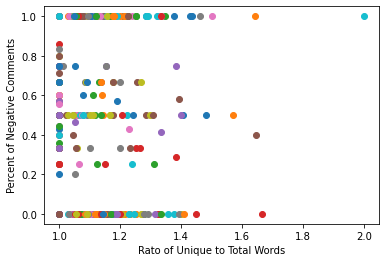

In [8]:
from matplotlib import pyplot as plt
for i in graph_out:
    plt.scatter(i[0],i[1])
plt.xlabel("Rato of Unique to Total Words")
plt.ylabel("Percent of Negative Comments")
plt.show()

In [7]:
all_temp = Counter()
for submission in all_words:
    submission_temp = Counter()
    for top_comment in submission[1]:
        submission_temp = submission_temp + top_comment[3]
    print(submission_temp.most_common(10), "\n")
    all_temp = all_temp + submission_temp
all_temp.most_common(20)

[('trump', 65), ('i', 57), ('would', 39), ('thank', 34), ('putin', 30), ('god', 25), ('biden', 24), ('ukraine', 23), ('president', 19), ('russia', 17)] 

[('i', 57), ('florida', 35), ('election', 34), ('people', 22), ('police', 20), ('desantis', 18), ('state', 18), ('voter', 15), ('the', 14), ('republican', 14)] 

[('ukraine', 41), ('republican', 28), ('i', 26), ('gop', 26), ('putin', 18), ('russia', 16), ('the', 16), ('they', 16), ('like', 15), ('party', 12)] 

[('trump', 125), ('putin', 117), ('i', 78), ('people', 34), ('would', 34), ('he', 31), ('like', 27), ('say', 26), ('president', 24), ('hannity', 22)] 

[('i', 34), ('time', 16), ('trump', 15), ('the', 14), ('like', 13), ('see', 12), ('get', 12), ('believe', 12), ('charge', 10), ('fall', 10)] 

[('i', 40), ('trump', 24), ('misinformation', 14), ('people', 11), ('youtube', 10), ('would', 9), ('go', 9), ('speech', 8), ('want', 8), ('video', 8)] 

[('disney', 31), ('pause', 20), ('i', 19), ('donation', 19), ('florida', 15), ('suppo

[('case', 23), ('garland', 23), ('law', 23), ('rule', 22), ('i', 19), ('so', 19), ('could', 19), ('sensitive', 17), ('u', 17), ('ag', 17)] 

[('plane', 27), ('buy', 19), ('trump', 13), ('one', 11), ('get', 10), ('money', 10), ('want', 9), ('i', 9), ('and', 9), ('televangelist', 9)] 

[('vote', 32), ('i', 26), ('texas', 23), ('ballot', 23), ('republican', 16), ('election', 15), ('mail', 15), ('if', 14), ('the', 12), ('people', 11)] 

[('nra', 24), ('i', 20), ('russian', 13), ('russia', 12), ('member', 8), ('know', 8), ('the', 8), ('money', 8), ('like', 7), ('trump', 7)] 

[('subreddit', 3), ('r', 3), ('politics', 3), ('please', 3), ('rule', 2), ('violation', 2), ('if', 2), ('question', 2), ('outlet', 2), ('moderator', 2)] 

[('please', 4), ('subreddit', 3), ('r', 3), ('politics', 3), ('a', 2), ('in', 2), ('rule', 2), ('violation', 2), ('result', 2), ('if', 2)] 

[('i', 18), ('modem', 11), ('list', 5), ('get', 5), ('service', 4), ('subreddit', 3), ('r', 3), ('politics', 3), ('support', 3

[('i', 1624),
 ('people', 696),
 ('trump', 554),
 ('the', 552),
 ('like', 548),
 ('would', 420),
 ('get', 396),
 ('if', 393),
 ('make', 383),
 ('putin', 383),
 ('republican', 364),
 ('r', 360),
 ('please', 356),
 ('politics', 338),
 ('this', 326),
 ('want', 320),
 ('subreddit', 305),
 ('it', 304),
 ('he', 299),
 ('see', 293)]

In [9]:
all_temp.most_common()[:-30-1:-1]
# weird_words = []
# for submission_words in all_words:
#     weird_words.append([submission_words.most_common()[:-10-1:-1]])

[('unconfirmed', 1),
 ('grifts', 1),
 ('billioniare', 1),
 ('coach', 1),
 ('uploads', 1),
 ('unscheduled', 1),
 ('carnival', 1),
 ('baboon', 1),
 ('marmalade', 1),
 ('jabba', 1),
 ('controller', 1),
 ('imitate', 1),
 ('felonious', 1),
 ('prisoner', 1),
 ('float', 1),
 ('doghouse', 1),
 ('snoopy', 1),
 ('runnning', 1),
 ('reasoning', 1),
 ('recurring', 1),
 ('monthly', 1),
 ('conning', 1),
 ('steak', 1),
 ('memorabilia', 1),
 ('discerning', 1),
 ('lemon', 1),
 ('cooper', 1),
 ('db', 1),
 ('finalized', 1),
 ('preacher', 1)]

In [12]:
print(t.tokenize('if'))
print(t.tokenize('If'))

['if']
['If']


In [15]:
positive_words = Counter()
negative_words = Counter()
for submission in all_words:
    for top_comment in submission[1]:
        if top_comment[0] > top_comment[1]:
            positive_words = positive_words + top_comment[3]
        if top_comment[0] < top_comment[1]:
            negative_words = negative_words + top_comment[3]
uniquely_positive = [word for word in positive_words if word not in negative_words]
uniquely_negative = [word for word in negative_words if word not in positive_words]

In [16]:
print(uniquely_positive, "\n\n")
print(uniquely_negative)

['learned', 'tenure', 'felt', 'proved', 'correct', 'planned', 'british', 'queue', 'snaking', 'polling', 'catastrophic', 'personally', 'ensured', 'stacey', 'abrams', 'da', 'hero', 'shown', 'concept', 'appreciation', 'agree', 'overall', 'direction', 'shitting', 'tasteless', 'yep', 'lincoln', 'eisenhower', 'daily', 'researching', 'border', 'developed', 'install', 'marxism', 'insanely', 'reader', 'dropped', 'mask', 'gushing', 'any', 'leading', 'figured', 'prudent', 'oppression', 'brown', 'shirt', 'widespread', 'electoral', 'certain', 'de', 'santis', 'nonexistent', 'giveaway', 'interference', 'overseeing', 'between', 'nonzero', 'elderly', 'republicunt', 'welll', 'ruining', 'drowns', 'appoint', 'officer', 'repeatedly', 'begin', 'alarming', 'cuban', 'latin', 'outreach', 'rework', 'trash', 'abbot', 'impartial', 'governing', 'blurred', 'communism', 'game', 'blatantly', 'throwing', 'lightly', 'none', 'match', 'philosophy', 'regime', 'fascisti', 'exalts', 'individual', 'centralized', 'autocratic'

In [17]:
print(len(positive_words), len(uniquely_positive))

2783 1212


In [21]:
print((positive_words - negative_words).most_common(30))

[('people', 15), ('say', 13), ('know', 12), ('tax', 10), ('case', 9), ('without', 9), ('candidate', 9), ('political', 8), ('fall', 8), ('politician', 8), ('election', 7), ('like', 7), ('read', 7), ('think', 7), ('congress', 7), ('attorney', 7), ('they', 6), ('fucking', 6), ('week', 6), ('nation', 6), ('maybe', 6), ('absolute', 6), ('member', 6), ('oil', 6), ('billion', 6), ('work', 6), ('year', 5), ('party', 5), ('when', 5), ('fuck', 5)]


In [22]:
print((negative_words - positive_words).most_common(30))

[('the', 30), ('he', 30), ('if', 27), ('i', 24), ('republican', 24), ('state', 23), ('would', 21), ('it', 20), ('fact', 18), ('shit', 18), ('bill', 18), ('said', 18), ('source', 18), ('price', 18), ('ukraine', 17), ('putin', 16), ('problem', 16), ('woman', 15), ('mean', 14), ('law', 14), ('way', 13), ('car', 13), ('get', 12), ('this', 11), ('got', 11), ('another', 11), ('weapon', 11), ('texas', 11), ('ectopic', 11), ('russia', 10)]
